# Summer Olympics Data Analysis Assignment

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("summer.csv")

In [5]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 1. In how many cities Summer Olympics is held so far?

In [7]:
print(len(df["City"].unique())," cities")

22  cities


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

Medal,Sport,Gold
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


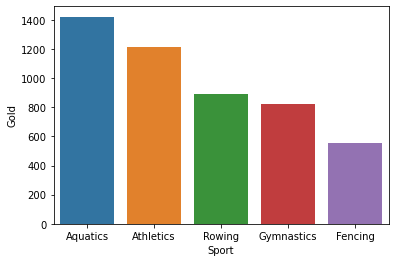

In [8]:
z=pd.crosstab(index=df["Sport"],columns=df["Medal"])
z=z.reset_index()
z=z.sort_values(by="Gold",ascending=False).head()
sns.barplot(x=z.Sport,y=z.Gold)
z.loc[ : ,["Sport","Gold"]]

### 3. Which sport is having most number of medals so far? (Top 5)

,index,Sport
0,Aquatics,4170
1,Athletics,3638
2,Rowing,2667
3,Gymnastics,2307
4,Fencing,1613


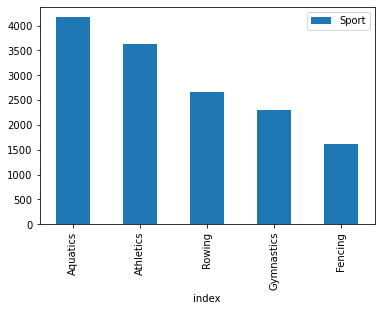

In [17]:
ls=df["Sport"].value_counts()
ls=ls.reset_index()
ls=ls.sort_values(by="Sport",ascending=False).head()
ls.plot(x="index",y="Sport",kind="bar")
ls.loc[ : ,["index","Sport"]]

### 4. Which player has won most number of medals? (Top 5)

,index,Athlete
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"SHAKHLIN, Boris",13
4,"MANGIAROTTI, Edoardo",13


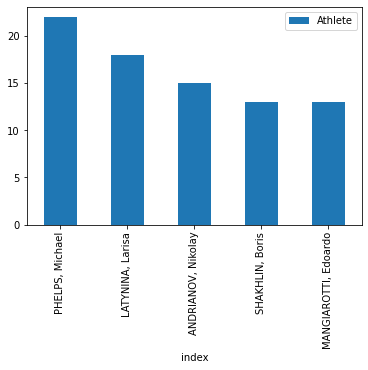

In [23]:
ls=df["Athlete"].value_counts()
ls=ls.reset_index()
ls=ls.sort_values(by="Athlete",ascending=False).head()
ls.plot(x="index",y="Athlete",kind="bar")
ls

### 5. Which player has won most number Gold Medals of medals? (Top 5)

Medal,Athlete,Gold
15702,"PHELPS, Michael",18
14594,"NURMI, Paavo",9
11202,"LATYNINA, Larisa",9
18886,"SPITZ, Mark",9
11538,"LEWIS, Carl",9


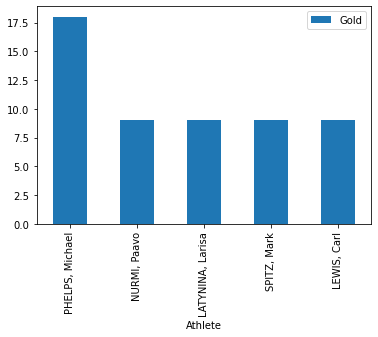

In [10]:
z=pd.crosstab(index=df["Athlete"],columns=df["Medal"])
z=z.reset_index()
z=z.sort_values(by="Gold",ascending=False).head()
z.plot(x="Athlete",y="Gold",kind="bar")
z.loc[ : ,["Athlete","Gold"]]

### 6. In which year India won first Gold Medal in Summer Olympics?

In [11]:
for i in range(len(df)):
    if(df["Country"][i]=="IND"):
        if(df["Medal"][i]=="Gold"):
            print(df["Year"][i])
            break

1928


### 7. Which event is most popular in terms on number of players? (Top 5)

,event,players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


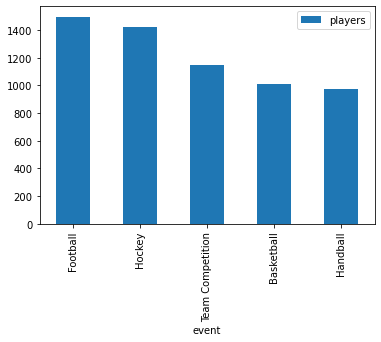

In [16]:
data=[]
for i in df["Event"].unique():
    data.append([i,len(df[df["Event"]==i])])
data=pd.DataFrame(data,columns=["event","players"])
data=data.sort_values(by="players",ascending=False).head()
data.plot(x="event",y="players",kind="bar")
data

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [31]:
df["Gender"].unique()

array(['Men', 'Women'], dtype=object)

In [26]:
z=pd.crosstab(index=df["Sport"],columns=df["Gender"])
z=z.sort_values(by="Women",ascending=False).head()
z["Women"]

Sport
Aquatics      1726
Athletics     1163
Gymnastics     799
Rowing         651
Volleyball     497
Name: Women, dtype: int64